In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

### Baca data

In [2]:
data = np.genfromtxt("dataRV.txt", names=["t", "v"])

In [3]:
t = data['t'].copy()
v = data['v'].copy()

### Plot semua

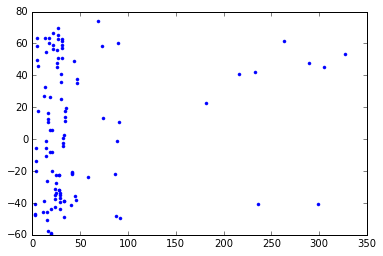

In [4]:
plt.plot(t, v, 'b.')

### Untuk yang repet2

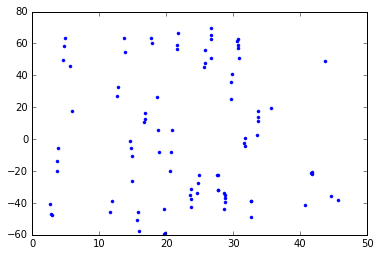

In [5]:
plt.plot(t[:90], v[:90], '.')

### Fungsi fitting

$v = A \cos{(\frac{2 \pi}{T} x + \theta)} + C$

### Tes untuk yang repet2

In [6]:
tt = t[:90]
vv = v[:90]

Parameter hasil fitting:  [-57.01595744   4.23178896   1.92235235   8.13378333]


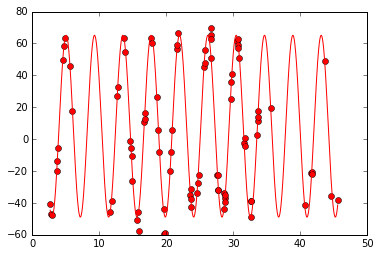

In [7]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3] # Target function 
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

p0 = [60.0, 4.0, 1.0, 0.0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(tt, vv))

print "Parameter hasil fitting: ", p1

time = np.linspace(tt.min(), tt.max(), 1000)
plt.plot(tt, vv, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

plt.show()

### Tes untuk semua data

Paramter hasil fitting:  [ 31.86708099   3.99763332   3.23133887   6.2694542 ]


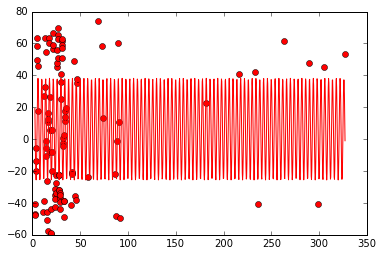

In [8]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

p0 = [62.0, 4.0, 2.0, 0.0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(t, v))

print "Paramter hasil fitting: ", p1

time = np.linspace(t.min(), t.max(), 1000)
plt.plot(t, v, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

plt.show()

Least squarenyaa gagal karena data bagian akhir yang sebarannya tidak merata... metode "least square tidak robust": tidak terlalu bagus hasilnya kalau ada data pencilan..

### Modifikasi fungsi fitting + dekatkan tebakan awal dengan 'hasil' yang sudah didapat di tes pertama

In [9]:
def fitfunc(p, t):
    x = t % p[1]  # t_lipat
    return p[0]*np.cos(2*np.pi/p[1]*x + p[2]) + p[3]

[-56.41228626   4.2311287    1.91790336   7.52945017]


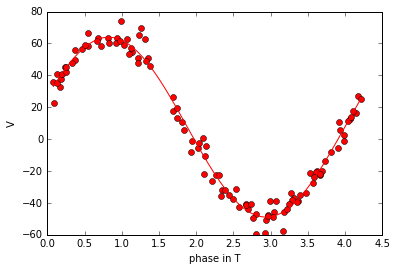

In [10]:
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

p0 = [62.0, 4.232, 2.0, 0.0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(t, v))

print p1

t_lipat = t % p1[1]

time = np.linspace(t_lipat.min(), t_lipat.max(), 1000)
plt.plot(t_lipat, v, "ro", time, p1[0]*np.cos(2*np.pi/p1[1]*time + p1[2]) + p1[3], "r-") # Plot of the data and the fit
plt.xlabel("phase in T")
plt.ylabel("V")

plt.show()